# Heart Failure Prediction

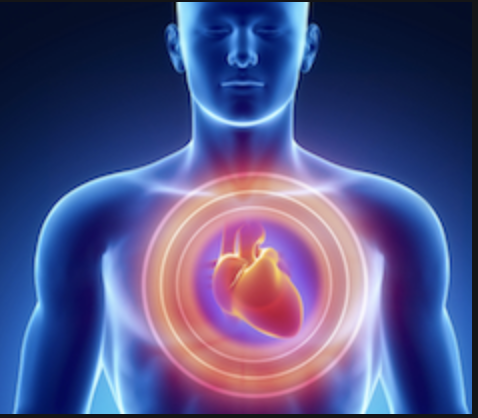

# Part 1 : DEFINE

### ---- 1 Define the problem ----

Heart failures occurs when heart cannot pump enough blood and oxygen to support other organs in our body. 
One person dies every 36 seconds from cardiovascular disease in the United States. About 655,000 Americans die from Heart disease each year- that is  1 in every 4 deaths as per the recent statistics(September 2020). Further Heart Disease costs US about $219 billion each year as estimated from 2014 to 2015, which includes cost of health care services, medicines and loss of productivity due to death , according to the Center of Disease Control and Prevention (CDC). 

The medical conditions that have impact on heart failures are - Diabetes, High Blood Pressure, obesity and other conditions related to heart. Machine Learning, in particular, can predict the patient's survival using the data such as-  electonic medical records of patients quantify symptoms, body features, and clinical laboratory test results. It can also individuate the most important features among those included in their medical records. 




**PREVENTION :** With the advancement of science and technology, if Heart failure's are diagnosied early,  it can be treated and can increase the survival rate.

“The very essence of cardiovascular practice is the early detection of heart failure” - Sir Thomas Lewis, 1933


This dataset contains 13 variables, namely age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, serum_creatinine, serum_sodium, sex, smoking, time and Death_event.

**Object:** The object of this project is to create a model that predicts the survival rate of  heart failures based on the above mentioned variables. 

In [1]:
# Import necessary libraries

#Analysis packages
import pandas as pd
import numpy as np

#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics


#author details
__author__ = "Nallavelli Manasa"
__email__ = "manasa2093@gmail.com"

# Part 2 : DISCOVER

### ---- 2 Import Data ----

In [2]:
#Reading the Data in Pandas Dataframe
path = ".........../heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(path)


In [3]:
#Checking the first 5 rows of dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### ---- 3 Clean the Data ----

In [4]:
#Checking the length and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


There are no inconsistencies in the dataset except for Age. Age is wrongly categorized as "Float", it should be converted to "int".

In [5]:
#Changing the data type of age to int 
df['age'] = df['age'].astype('int')


In [6]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [7]:
#Checking for null values
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [8]:
# Checking if there any duplicated records in the dataset
print("The number of duplicated records in data set: ", df.duplicated().sum())

The number of duplicated records in data set:  0



### **Summary of the data set:**

There are 299 entries and 13 variables in the dataset. 

- **Independent variables :** age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction , high_blood_pressure, platelets , serum_creatinine , serum_sodium, sex, smoking and time. <br> 

- **Dependent variable:** Death event.  (0 - No, 1 - Yes)




### ---- 4 Explore the Data ----

In [9]:
#Number of columns and rows in the dataset
df.shape

(299, 13)

In [10]:
#Statistical overview of the dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
#Calculate the rate of Death event 
df['DEATH_EVENT'].value_counts()/ 299

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

 The rate at which death occured is 32% in the entire dataset.

Text(0.5, 1, 'Age vs Death_Event')

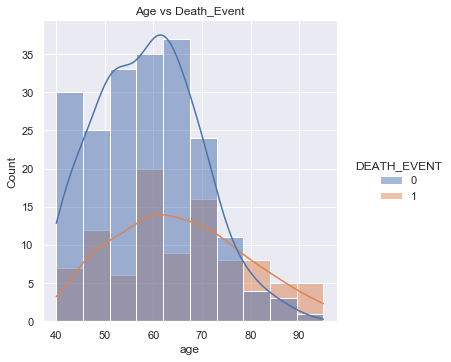

In [12]:
#Identifying the relationship between age with target variable
sns.set_theme()
sns.displot(df, x= 'age', hue="DEATH_EVENT",kde=True)
plt.title("Age vs Death_Event")

    

Text(0.5, 1, 'Ejection_fraction vs Death_Event')

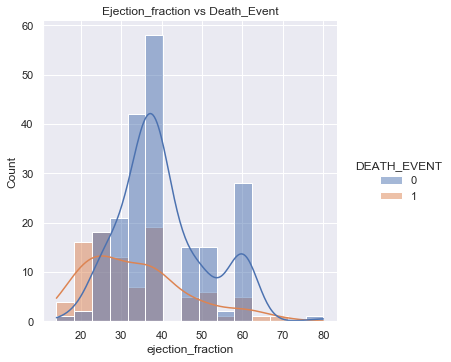

In [13]:
#Identifying the relationship between ejection_fraction with target variable
sns.set_theme()
sns.displot(df, x= 'ejection_fraction', hue="DEATH_EVENT",kde=True)
plt.title("Ejection_fraction vs Death_Event")

Text(0.5, 1, 'Time vs Death_Event')

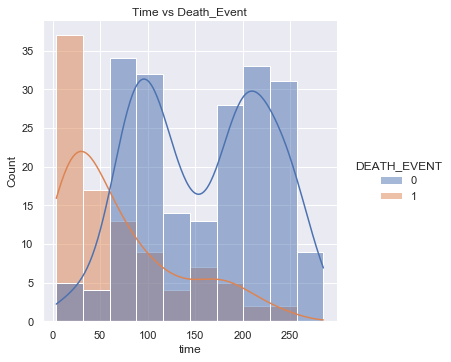

In [14]:
#Identifying the relationship between time with target variable
sns.set_theme()
sns.displot(df, x= 'time', hue="DEATH_EVENT",kde=True)
plt.title("Time vs Death_Event")

**Analyzing the above plots reveal that:**

**1. Age & Death :** patients aged above 80 have more chances of morality. <br> 
**2. Ejection_fraction & Death :** patients with low ejection fraction, that is less than 30 have more chances mortality and above 30 have higher chance of surviving.  <br> 
**3. Time & Death:** Patients with less followup period resulted in more deaths.  <br> 

/Users/sai/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'serum_sodium Count')

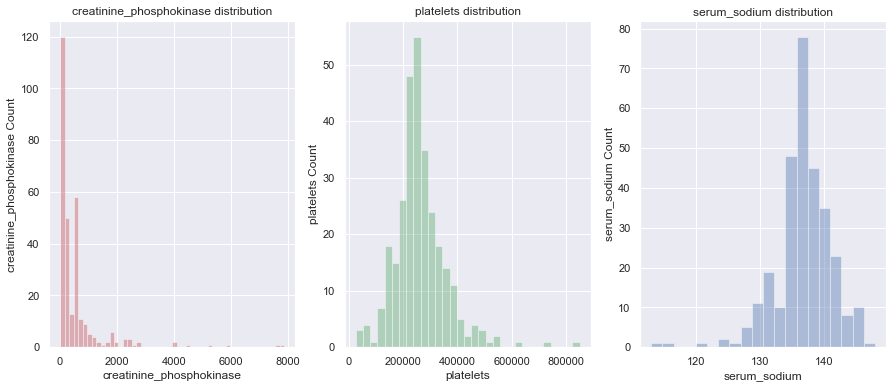

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph creatinine_phosphokinase
sns.distplot(df.creatinine_phosphokinase, kde=False, color="r", ax=axes[0]).set_title('creatinine_phosphokinase distribution')
axes[0].set_ylabel('creatinine_phosphokinase Count')

# Graph platelets
sns.distplot(df.platelets, kde=False, color="g", ax=axes[1]).set_title('platelets distribution')
axes[1].set_ylabel('platelets Count')

# Graph serum_sodium
sns.distplot(df.serum_sodium,kde=False, color="b", ax=axes[2]).set_title('serum_sodium distribution')
axes[2].set_ylabel('serum_sodium Count')


Text(0.5, 1, 'time vs age')

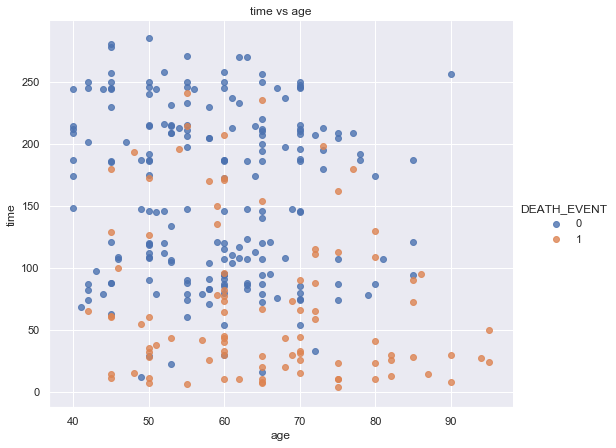

In [16]:
#Finding the patterns between age and time with respect to Death_event
sns.set_style("darkgrid")
sns.lmplot(x='age', y='time', data=df, fit_reg=False, hue='DEATH_EVENT', height=6, aspect=1.2)  
plt.title('time vs age')

### Time vs Age with respect to morality

There are 2 distinct clusters namely:

**Cluster 1- Mortality:** Followup period below 50 and any age : These have high chances of mortality. <br>
**Cluster 2: Survival:** Patients with age less than 80 and follow up period more than 50 - have higher changes of survival.

Text(0, 0.5, 'percent ')

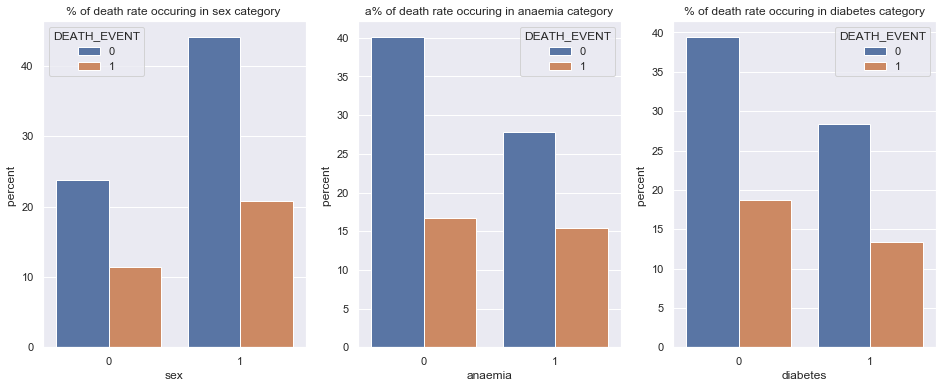

In [17]:
#Identifying the relationship between binary varibale and target variables
f, axes = plt.subplots(ncols=3, figsize=(16, 6))
sns.barplot(ax=axes[0],x="sex", y="sex", hue="DEATH_EVENT", data=df,estimator=lambda x: len(x) / len(df) * 100)
axes[0].set_title('% of death rate occuring in sex category ')
axes[0].set_ylabel('percent ')


sns.barplot(ax=axes[1],x="anaemia", y="anaemia", hue="DEATH_EVENT", data=df,estimator=lambda x: len(x) / len(df) * 100)
axes[1].set_title('a% of death rate occuring in anaemia category')
axes[1].set_ylabel('percent ')

sns.barplot(ax=axes[2],x="diabetes", y="diabetes", hue="DEATH_EVENT", data=df,estimator=lambda x: len(x) / len(df) * 100)
axes[2].set_title('% of death rate occuring in diabetes category')
axes[2].set_ylabel('percent ')




Text(0, 0.5, 'percent ')

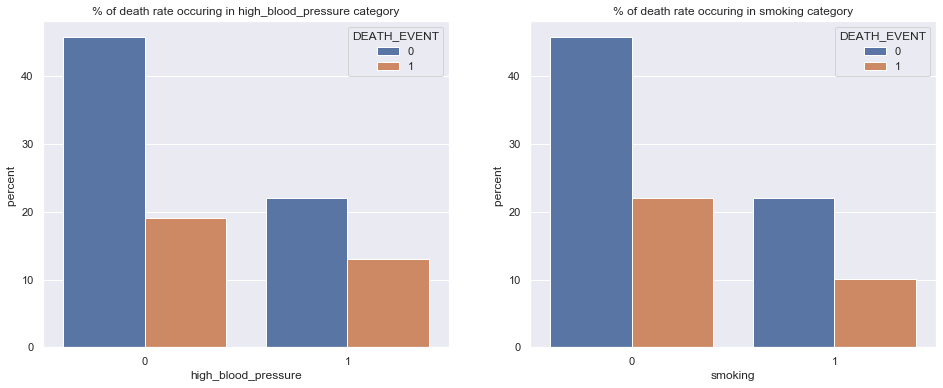

In [18]:
f, axes = plt.subplots(ncols=2, figsize=(16, 6))
sns.barplot(ax=axes[0],x="high_blood_pressure", y="high_blood_pressure", hue="DEATH_EVENT", data=df,estimator=lambda x: len(x) / len(df) * 100)
axes[0].set_title('% of death rate occuring in high_blood_pressure category')
axes[0].set_ylabel('percent ')

sns.barplot(ax=axes[1],x="smoking", y="smoking", hue="DEATH_EVENT", data=df,estimator=lambda x: len(x) / len(df) * 100)
axes[1].set_title('% of death rate occuring in smoking category')
axes[1].set_ylabel('percent ')

**Analysis of Categorical variables:**
    
**Sex Category:** Female has higher chance of surviving than males. <br>
**Anaemia:** Patients with and without anaemia both have same chances of surviving. <br>
**Diabetes:** There is not much difference between the patients with and without Diabetes but patients without diabetes have higher chance of Mortality. <br>
**High_blood_pressure:** There are no siginificant differences between the two. <br>
**Smoking:** Patients who do smoke have higher chance of survival. 

In [19]:
#Finding the correlation
corr = df.corr()


Text(0.5, 1, 'Correlation Matrix')

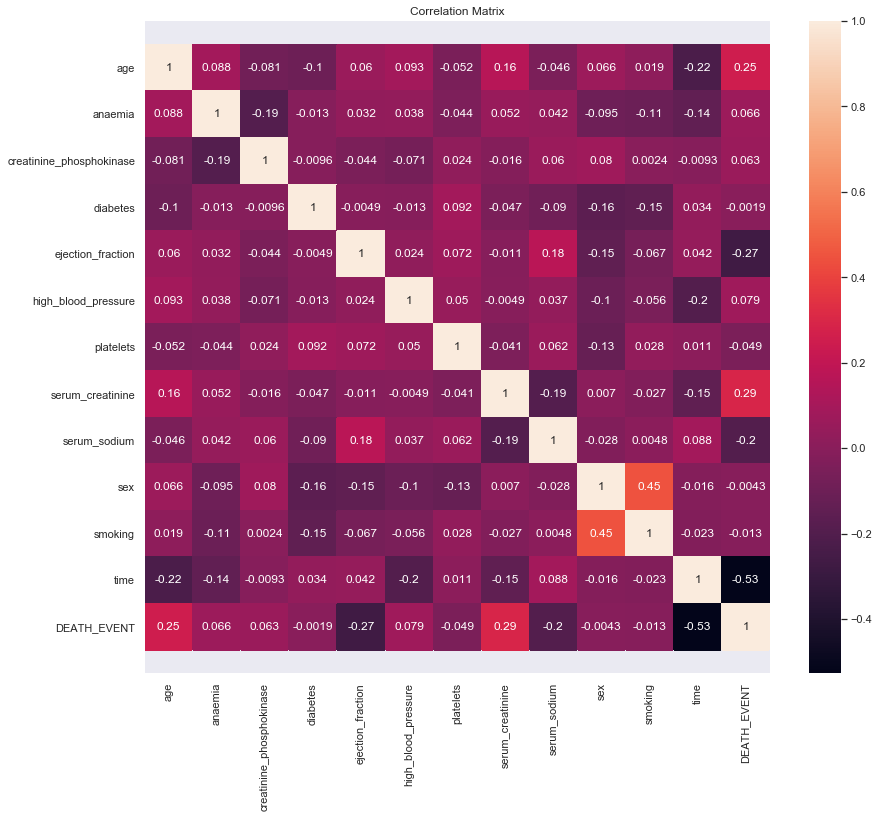

In [20]:
#plotting heatmap
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, xticklabels=df.columns.values,yticklabels=df.columns.values, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix')

**Findings from correlation matrix:** <br>

**Correlated variables:** Age, Ejection_fraction, serum_creatinine, serum_sodium, time. <br>
**Not Correlated:** Diabetes, sex are least correlated 

### ---- 5 Baseline ----

In [21]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [22]:
#Randomly assigning (0,1) based on 70-30% using Numpy 
baseline = np.random.choice([0, 1], size=299, p=[.7, .3])
baseline_y = pd.Series(baseline)
baseline_y

0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    1
296    1
297    0
298    1
Length: 299, dtype: int64

In [23]:
#Checking the Accuracy of the baseline
print(metrics.classification_report(baseline_y, df['DEATH_EVENT']))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       212
           1       0.29      0.32      0.31        87

    accuracy                           0.58       299
   macro avg       0.50      0.50      0.50       299
weighted avg       0.59      0.58      0.58       299



In [24]:
# Print Confusion Matrix
cm_baseline = metrics.confusion_matrix(baseline_y, df['DEATH_EVENT'])

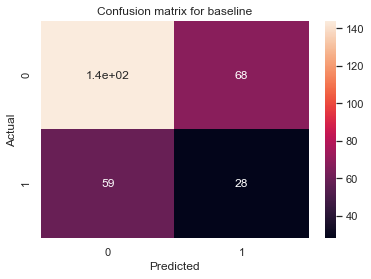

In [25]:
#Visualizing confusion matrix for baseline model
sns.heatmap(cm_baseline, annot=True)
plt.title("Confusion matrix for baseline")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The confusion matrix displays the correctly predicted as well as incorrectly predicted values. 

**True negative** is an outcome where the model correctly predicts the negative class : 14e+02 Patients were correctly predicted as Survived <br> 
**True Positives** is an outcome where the model correctly predicts the positive class : 29 patients were correctly classified as dead <br>
**False positive** is an outcome where the model incorrectly predicts the positive class : 67 patients were predicted to be dead when they actually survived <br>
**False negative** is an outcome where the model incorrectly predicts the negative class : 64 patients were predicted to be survived when they are actually dead<br>
 
 
From the above analysis, decreasing the False positive rate is important as incorrectly perdicting a person to be dead when they are still alive, would deprive the patients from getting necessary treatment. Hence our **goal** is to reduce the False Positives. 

We can choose Accuracy to be the Evaluation Metric.

Accuracy score defines the ratio of the number of correct predictions to the total predictions which are made. 

The accuracy of the baseline model is **56%**. We can increase the accuracy by deploying few Machine Learning models.

# Part 3 - DEVELOP

### ---- 5 Engineer Features ----

In [26]:
#Scaling numeric variables
mms = MinMaxScaler()

df[['age','ejection_fraction','platelets','serum_creatinine','time','serum_sodium','creatinine_phosphokinase']] = mms.fit_transform(df[['age',
                                'ejection_fraction','platelets','serum_creatinine','time','serum_sodium','creatinine_phosphokinase']])

In [27]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1


In [28]:
#Split data into Training and testing
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

In [30]:
#checking the number of rows in train dataset 
x_train.shape

(209, 12)

In [31]:
#checking the number of rows in test dataset 
y_test.shape

(90,)

In [32]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
132,0.109091,0,0.088798,0,0.393939,1,0.288833,0.076404,0.685714,0,0,0.366548
127,0.327273,1,0.022582,1,0.696970,0,0.333253,0.033708,0.685714,0,0,0.355872
125,0.054545,1,0.042740,0,0.545455,0,0.256880,0.089888,0.628571,0,0,0.330961
158,0.818182,1,0.113167,0,0.545455,0,0.254455,0.089888,0.600000,1,0,0.416370
245,0.381818,1,0.007272,1,0.363636,0,0.311432,0.101124,0.685714,1,0,0.743772
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.545455,0,0.005869,0,0.393939,0,0.324767,0.134831,0.657143,0,0,0.252669
181,0.345455,1,0.019520,1,0.166667,0,0.237483,0.056180,0.657143,1,1,0.519573
46,0.200000,0,0.173131,0,0.166667,1,0.298097,0.044944,0.485714,1,0,0.120996
257,0.327273,0,0.013907,1,0.363636,1,0.276276,0.056180,0.742857,1,0,0.804270


### ---- 6 Create Models ----

I would like to develop the following 2 models and use GridSearchCV to select the best parameters. The metric which is used for evaluation is **Accuracy score**  as our goal is to reduce the False positive rate. <br>

**Logistic Regression -** It is easier to implement and interpret. <br>
**Random Forest -** It is a combination of Decision trees that can be best modeled for prediction. 


## Logistic regression

In [33]:
#Creating parameters for logistic regression Hyperparameter tuning

parameters_logistic = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'penalty':['none','l1','l2','elasticnet'],
                      'C':[1,2,3,4,5,0.01,0.1]}
lr = LogisticRegression()

In [34]:
#Finding the best parameters through Grid search
grid = GridSearchCV(lr, parameters_logistic, cv = 3, n_jobs=-1)
Logistic_best = grid.fit(x_train, y_train)

In [35]:
print("The best hyper parameters for Logistic regression are: {}".format(Logistic_best.best_params_))
print("The cross val score using the best hyper parameters for  Logistic regression is: {}".format(Logistic_best.best_score_))

The best hyper parameters for Logistic regression are: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
The cross val score using the best hyper parameters for  Logistic regression is: 0.8371980676328503


In [36]:
#Fitting the best parameters for logistic regression
Logistic_best.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 0.01, 0.1],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [37]:
# Store predictions of logistic model
predict_logit = Logistic_best.predict(x_test)
predict_logit

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1])

In [38]:
# Print Confusion Matrix for Logistic Regression model
cm = metrics.confusion_matrix(y_test, predict_logit)


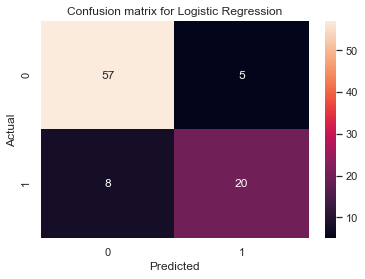

In [39]:
#Visualizing confusion matrix
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**True negative** 52 Patients were correctly predicted as Survived <br> 
**True Positives** 19 patients were correctly classified as dead <br>
**False positive** 10 patients were predicted to be dead when they actually survived <br>
**False negative** 9 patients were predicted to be survived when they are actually dead<br>



In [40]:
#The classification report for Logistic regression model
print ("\n\n ---Logistic Regression Model---") 
print(metrics.classification_report(y_test, predict_logit,target_names = ['0 No Death', '1 Death ']))



 ---Logistic Regression Model---
              precision    recall  f1-score   support

  0 No Death       0.88      0.92      0.90        62
    1 Death        0.80      0.71      0.75        28

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90



Precision tells us , how precise or accurate the model is, out of all predicted values which are predicted to be positive ,how may of them are actually positive ? <br>

**Precision =** True Positive / ( True positive+ False Positive) <br>

Recall calculates how many of the actual positives the model capture through labeling it as positive.  <br>

**Recall =** True Positive / (True positive + False Negative) <br>

F1 score calcualtes the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the accuracy metric.  <br>

Logistic regression model reduced the False positives by **85%** over the baseline model. But we still have 5 False Positives in our model meaning, there are 5 patients were predicted to be dead when they actually survived. <br>

We will see if we can further reduce the number of false positives using **Random Forest**

## Random Forest

In [41]:
#Create hyperparameters for random forest
parameters_rf={
    'n_estimators':np.arange(100,1000,100),
    'criterion':['gini', 'entropy'],
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf':np.arange(1,10),
    'max_features' : ['auto','sqrt']
}

In [42]:
#Fitting Random forest model
rf= RandomForestClassifier()

In [254]:
#Finding the best parameters through Grid search
gridF = GridSearchCV(rf, parameters, cv = 3, n_jobs=-1)
bestF = gridF.fit(x_train, y_train)

In [259]:
print("The best hyper parameters for Randomforest are: {}".format(bestF.best_params_))
print("The cross val score using the best hyper parameters for Randomforest is: {}".format(bestF.best_score_))


The best hyper parameters for Randomforest are: {'criterion': 'entropy', 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 300}
The cross val score using the best hyper parameters for Randomforest is: 0.861352657004831


In [309]:
#Fitting the best parameters for Random forest
bestF.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [365]:
# Store predictions of Random Forest
predict_RF = bestF.predict(x_test)
predict_RF

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

In [368]:
# Print Confusion Matrix
RF_matrix = metrics.confusion_matrix(y_test, predict_RF)



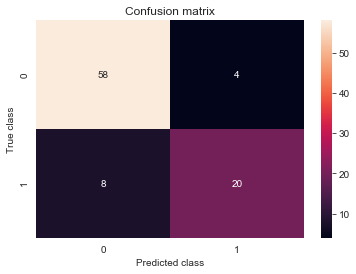

In [414]:
#Visualizing confusion matrix for Random Forest
sns.heatmap(RF_matrix , annot=True)
plt.title("Confusion matrix for Random Forest")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [446]:
print (metrics.classification_report(y_test, predict_RF,target_names = ['No Death 0 ', 'Death 1']))

              precision    recall  f1-score   support

  0 No Death       0.88      0.94      0.91        62
    1 Death        0.83      0.71      0.77        28

    accuracy                           0.87        90
   macro avg       0.86      0.82      0.84        90
weighted avg       0.86      0.87      0.86        90




Random Forest model has **4 False positives**  and accuracy is improved to 87% . But we still have 4 False Positives in our model meaning, there are 4 patients were predicted to be dead when they actually survived. <br>


## EVALUATION

Evaluate the model performance with ROC Curve plot. <br>

Receiver Operator Characteristic (ROC) is the tradeoff betwee true positive rate (TPR) and false positive rate (FPR). It is a measure from 0 (worst) to 1 (best). 

In [371]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#roc_aoc score
logit_auc = roc_auc_score(y_test, predict_logit)
RF_auc = roc_auc_score(y_test, predict_RF)


#roc curve
fp_logit, tp_logit, threshold1 = roc_curve(y_test, predict_logit)
fp_RF, tp_RF, threshold2 = roc_curve(y_test, predict_RF)

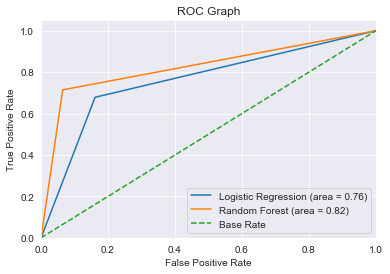

In [372]:
#plotting ROC graph

plt.plot(fp_logit, tp_logit, label='Logistic Regression (area = %0.2f)' % logit_auc)
plt.plot(fp_RF, tp_RF, label='Random Forest (area = %0.2f)' % RF_auc)

plt.plot([0,1], [0,1],label='Base Rate',linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

Random Forest has the best area under the chart that is 0.82 , hence it will be selected as the best model.

# SELECTING THE BEST MODEL

In [44]:
best_model = RandomForestClassifier( criterion = 'entropy', min_samples_leaf = 9, min_samples_split = 7, n_estimators = 300)

In [45]:
best_model 

RandomForestClassifier(criterion='entropy', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=300)

In [46]:
best_model .fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=300)

In [47]:

y_pred = best_model.predict(x_test)
accuracy_score(y_test, y_pred)



0.8444444444444444

In [48]:
print("The accuracy score  for Random Forest is: {}".format(accuracy_score(y_test, y_pred)))

The accuracy score  for Random Forest is: 0.8444444444444444


# Feature Importance 

Feature importance in random forest indicate the sum of reduction in Gini Impurity of the overall nodes that are split on that feature. <BR>
    
The feature importances can be extracted from a trained random forest and visualized using bar charts. 

In [49]:
importance = best_model.feature_importances_

In [50]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, "Importance" : importance})

In [51]:
#Sorting values by ascending values
feature_importance.sort_values(by='Importance',  inplace=True)
feature_importance.set_index('Feature', inplace=True, drop=True)

Text(0.5, 1.0, 'FEATURE IMPORTANCE PLOT')

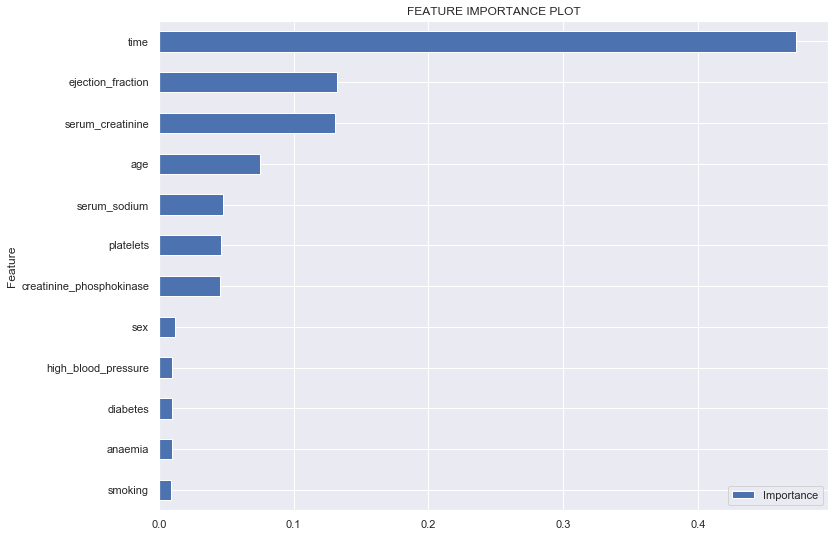

In [52]:
fig = feature_importance.plot.barh(figsize=(12,9))
fig.set_title('FEATURE IMPORTANCE PLOT')

This gives us an insights into which variables are important. For example, Time, Serum_creatininie, age, ejection_fraction  are considered as the most important variables. 

## CONCLUSION

Random Forest model reduced the False positives by 85% over the baseline model. The evaluation metric considered was Accuracy. The Accuracy for Random forest model for test data set is 87%.  